In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shark-attacks/attacks.csv


# **Data Wrangling**

In [2]:
df = pd.read_csv("../input/shark-attacks/attacks.csv",sep=',',encoding='latin-1')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0


In [3]:
df.shape

(25614, 22)

In [4]:
# check which columns have missing values with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25614 entries, 0 to 25613
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6095 non-null   object 
 1   Date                    6094 non-null   object 
 2   Year                    6092 non-null   float64
 3   Type                    6090 non-null   object 
 4   Country                 6048 non-null   object 
 5   Area                    5682 non-null   object 
 6   Location                5583 non-null   object 
 7   Activity                5559 non-null   object 
 8   Name                    5888 non-null   object 
 9   Sex                     5517 non-null   object 
 10  Age                     3374 non-null   object 
 11  Injury                  6066 non-null   object 
 12  Fatal (Y/N)             6064 non-null   object 
 13  Time                    2848 non-null   object 
 14  Species                 3100 non-null 

In [5]:
df.isnull().sum()

Case Number               19519
Date                      19520
Year                      19522
Type                      19524
Country                   19566
Area                      19932
Location                  20031
Activity                  20055
Name                      19726
Sex                       20097
Age                       22240
Injury                    19548
Fatal (Y/N)               19550
Time                      22766
Species                   22514
Investigator or Source    19537
pdf                       19520
href formula              19521
href                      19521
Case Number.1             19520
Case Number.2             19520
original order            19520
dtype: int64

In [6]:
#check duplicated values
df.duplicated().sum()

19517

The data has duplicated values 


In [7]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

Notice that the column name for 'Sex ' and 'Species ' contains spaces

In [8]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

**** Dropping Unecessary columns from our data ****

In [9]:
df.drop(columns=['pdf', 'href formula', 'href', 'Case Number.1','Case Number.2','original order','Investigator or Source','Name'], axis=1, inplace=True)

# confirm changes
df.head(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m"


**Renaming 'Sex ' and 'Species ' without spaces**

In [10]:
df.rename(columns={"Sex ":"Sex","Species ":"Species"},inplace=True)

In [11]:
#check Columns Names after editing
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species'],
      dtype='object')

**Dropping duplicated values from data**

In [12]:
df.drop_duplicates(keep=False, inplace=True)

In [13]:
#check if all duplicated value dropped
df.duplicated().sum()

0

**drop rows with any null and missing  values in the dataset**

In [14]:
# drop rows with any null and missing values in dataset
df.dropna(inplace=True)

In [15]:
#check if all null values 
df.isnull().sum()

Case Number    0
Date           0
Year           0
Type           0
Country        0
Area           0
Location       0
Activity       0
Sex            0
Age            0
Injury         0
Fatal (Y/N)    0
Time           0
Species        0
dtype: int64

In [16]:
df['Year'].value_counts()

2015.0    68
2007.0    56
2012.0    54
2002.0    53
2013.0    49
          ..
1919.0     1
1924.0     1
1944.0     1
1943.0     1
1916.0     1
Name: Year, Length: 105, dtype: int64

****From the above describe code we noticed that '2015'the most year that had the max number of shark attacks ****

In [17]:
df['Fatal (Y/N)'].value_counts()

N       1195
Y        242
 N         2
2017       1
Name: Fatal (Y/N), dtype: int64

****The data for 2017 is not clear what is referred to,so I will drop it ****

In [18]:
df.drop(df[df['Fatal (Y/N)']=='2017'].index,inplace=True)


In [19]:
df['Fatal (Y/N)'].value_counts()

N     1195
Y      242
 N       2
Name: Fatal (Y/N), dtype: int64

**There are 2 values recorded with space ' N' so I will group it to 'N' data**

In [20]:
df['Fatal (Y/N)'].mask(df['Fatal (Y/N)'] ==' N','N', inplace=True)

In [21]:
df['Fatal (Y/N)'].value_counts()

N    1197
Y     242
Name: Fatal (Y/N), dtype: int64

In [22]:
df['Sex'].value_counts()

M      1238
F       200
lli       1
Name: Sex, dtype: int64

****The data for '11i' is not clear what is referred to,so I will drop it ****

In [23]:
df.drop(df[df['Sex']=='lli'].index,inplace=True)

In [24]:
df['Sex'].value_counts()

M    1238
F     200
Name: Sex, dtype: int64

In [25]:
#save cleaned data to new file 
df.to_csv('cleaned.csv')

# # Exploratory Data Analysis

# **What was the most Country of shark attacks?**

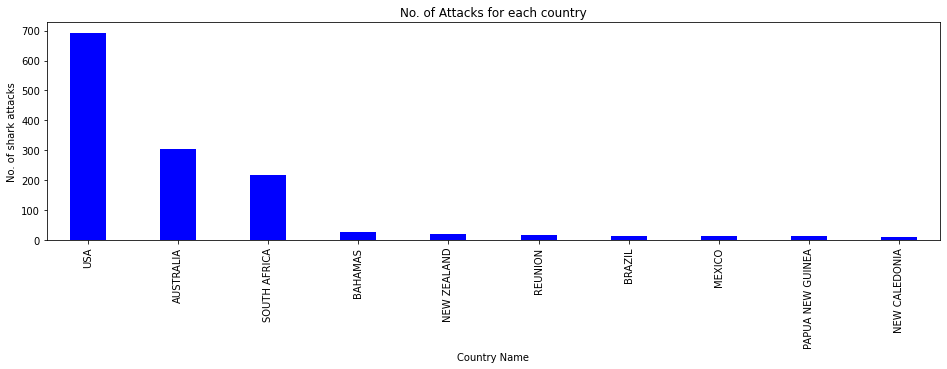

In [26]:
plt.figure(figsize=[16,4])
df['Country'].value_counts().head(10).plot(kind='bar',color="b",width =0.4)
plt.xlabel("Country Name")
plt.ylabel("No. of shark attacks")
plt.title("No. of Attacks for each country")
plt.show()

**This graph shows that US the most country of shark attacks followed by Australia**

# What was the most Area of shark attacks?

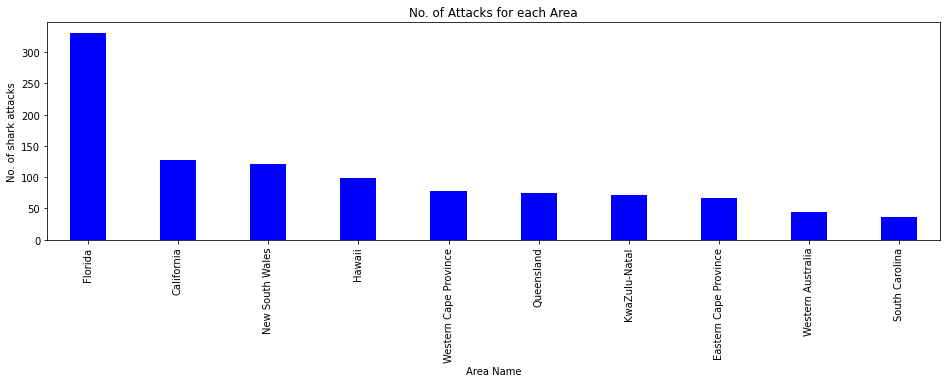

In [27]:
plt.figure(figsize=[16,4])
df['Area'].value_counts().head(10).plot(kind='bar',color="b",width =0.4)
plt.xlabel("Area Name")
plt.ylabel("No. of shark attacks")
plt.title("No. of Attacks for each Area")
plt.show()

**The chart shows that 'Florida' was the highest area of shark attacks followed by 'California' area**

# What was the most Location of shark attacks?

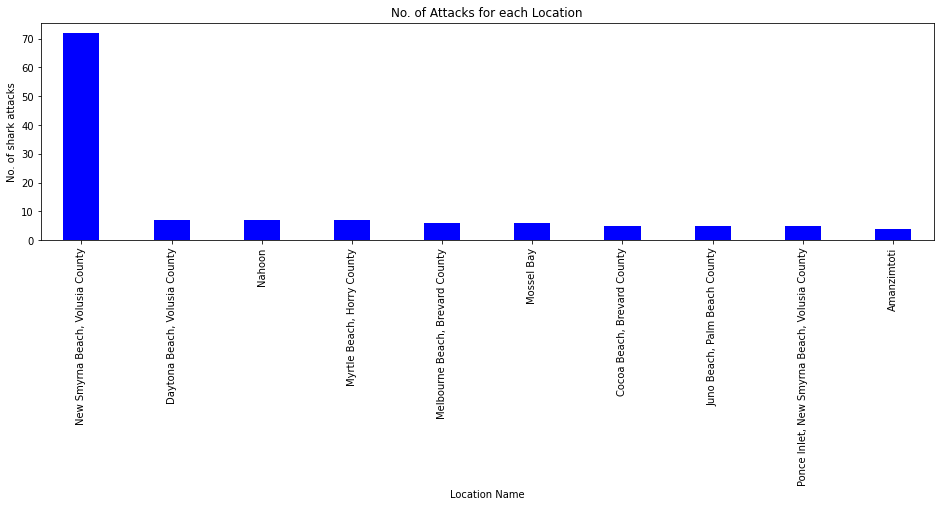

In [28]:
plt.figure(figsize=[16,4])
df['Location'].value_counts().head(10).plot(kind='bar',color="b",width =0.4)
plt.xlabel("Location Name")
plt.ylabel("No. of shark attacks")
plt.title("No. of Attacks for each Location")
plt.show()

**The chart shows that 'New Smyrna Beach' was  the highest Location of shark attacks**

# What was the Percentage of attack on males and females?

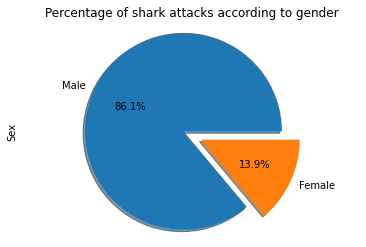

In [29]:

myexplode = [0.2, 0]
mylabels = ["Male","Female"]
df['Sex'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%',explode=myexplode ,labels =mylabels,shadow = True)
plt.title('Percentage of shark attacks according to gender' )
plt.axis('equal')
plt.show() 

**From the above chart ,it shows that The rate of attack on males is higher than on females**

# was the shark attacks fatal?

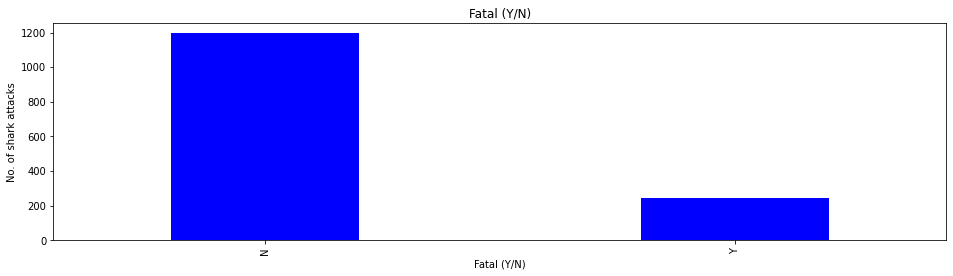

In [30]:
plt.figure(figsize=[16,4])
df['Fatal (Y/N)'].value_counts().head(10).plot(kind='bar',color="b",width =0.4)
plt.xlabel("Fatal (Y/N)")
plt.ylabel("No. of shark attacks")
plt.title("Fatal (Y/N)")
plt.show()

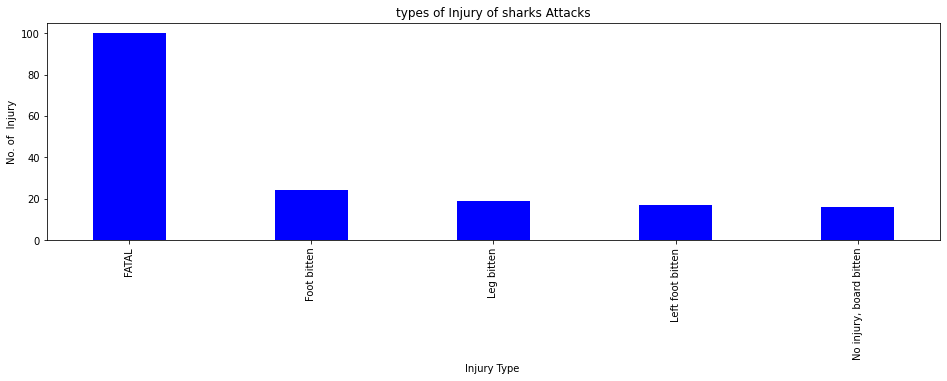

In [31]:
plt.figure(figsize=[16,4])
df['Injury'].value_counts().head(5).plot(kind='bar',color="b",width =0.4)

plt.xlabel("Injury Type ")
plt.ylabel("No. of  Injury")
plt.title("types of Injury of sharks Attacks")
plt.show()

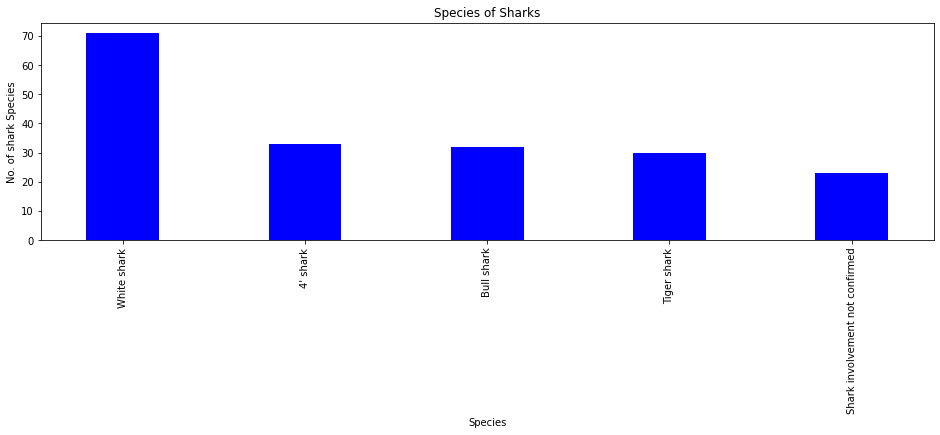

In [32]:
plt.figure(figsize=[16,4])
df['Species'].value_counts().head(5).plot(kind='bar',color="b",width =0.4)
plt.xlabel("Species")
plt.ylabel("No. of shark Species")
plt.title("Species of Sharks")
plt.show()

****It has been observed that the' white shark' is the most aggressive shark**

# What is the most common year of shark attacks?

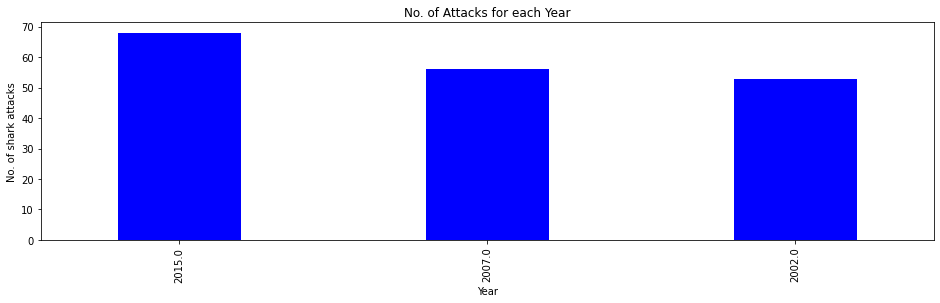

In [33]:
plt.figure(figsize=[16,4])
df['Year'].value_counts().head(3).plot(kind='bar',color="b",width =0.4)
plt.xlabel("Year")
plt.ylabel("No. of shark attacks")
plt.title("No. of Attacks for each Year")
plt.show()

****we noticed that the year'2015'was the most year that had the max number of shark attacks ****

# Conclusions

1. The US was the high country of shark attacks, especially in the Florida region
2. 'New Smyrna Beach' was  the highest Location of shark attacks
3. The rate of attack on males is higher than on female
4. The year '2015' was the most year that had the max number of shark attacks 


**Limitation:**
Dropping the rows with missing values  affected the overall analysis.